In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
train = pd.read_csv("Train.csv")
train["Type"] = "train"
print(train.shape)


(8523, 13)


In [3]:
test = pd.read_csv("Test.csv")
test["Type"] = "test"
print(test.shape)

Data_Predicted = test.loc[:,["Item_Identifier","Outlet_Identifier","Item_MRP"]]  


(5681, 12)


In [4]:
dframes = [train,test]
sales = pd.concat(dframes,ignore_index = True)
print(sales.shape)
sales.head()

(14204, 13)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [10]:
sales.describe(include="all")

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,14204,14204,14204.000000,8523.000000,14204,14204.000000,11765.000000,14204.000000,14204,14204,10188,14204,14204
unique,5,1559,NaN,NaN,16,NaN,NaN,NaN,10,3,3,4,2
top,Low Fat,FDQ45,NaN,NaN,Fruits and Vegetables,NaN,NaN,NaN,OUT027,Tier 3,Medium,Supermarket Type1,train
freq,8485,10,NaN,NaN,2013,NaN,NaN,NaN,1559,5583,4655,9294,8523
mean,NaN,NaN,141.004977,2181.288914,NaN,0.065953,12.792854,1997.830681,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,62.086938,1706.499616,NaN,0.051459,4.652502,8.371664,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,31.290000,33.290000,NaN,0.000000,4.555000,1985.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,94.012000,834.247400,NaN,0.027036,8.710000,1987.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,142.247000,1794.331000,NaN,0.054021,12.600000,1999.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,185.855600,3101.296400,NaN,0.094037,16.750000,2004.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
sales["Qty_Sold"] = (sales["Item_Outlet_Sales"]/sales["Item_MRP"])
sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,Qty_Sold
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14.951963
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,9.186454
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14.809346
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train,4.021967
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,18.467868


In [14]:
sales.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Type                            0
Qty_Sold                     5681
dtype: int64

In [18]:
UniqueItems = set(sales.Item_Identifier)
for each in UniqueItems:
    sales.loc[(sales["Item_Identifier"]==str(each)) & (sales["Item_Visibility"]==0),"Item_Visibility"] = sales.loc[(sales["Item_Identifier"]==str(each)) & (sales["Item_Visibility"]!=0),"Item_Visibility"].mean()
sales["Item_Visibility"].describe()

count    14204.000000
mean         0.070458
std          0.050086
min          0.003575
25%          0.031381
50%          0.058064
75%          0.098042
max          0.328391
Name: Item_Visibility, dtype: float64

In [19]:
for each in UniqueItems:
    sales.loc[(sales["Item_Identifier"]==str(each)) & (sales["Item_Weight"].isnull()),"Item_Weight"] = sales.loc[sales["Item_Identifier"]==str(each),"Item_Weight"].mode()[0]

In [21]:
sales.Item_Weight.isnull().sum()

0

In [23]:
import datetime
now = datetime.datetime.now()
now.year

sales["Outlet_Age"] = now.year - sales["Outlet_Establishment_Year"]
sales["Outlet_Age"].head()

0    19
1     9
2    19
3    20
4    31
Name: Outlet_Age, dtype: int64

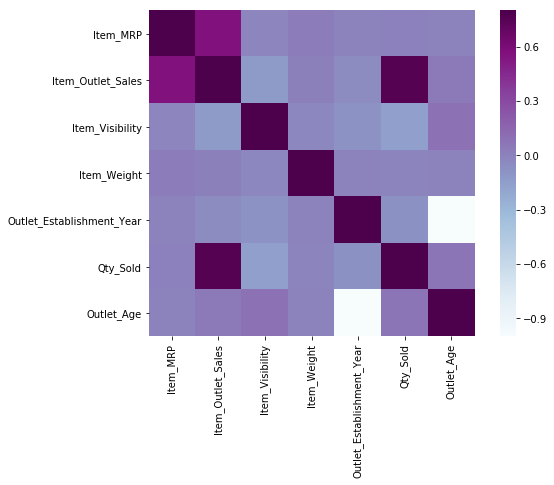

In [24]:
matrix = sales.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [25]:
sales.describe(include=["object"]).columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Type'],
      dtype='object')

In [27]:
sales.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [28]:
sales.loc[sales["Outlet_Size"].isnull(),"Outlet_Identifier"].value_counts()

OUT045    1548
OUT017    1543
OUT010     925
Name: Outlet_Identifier, dtype: int64

In [30]:
sales.loc[(sales["Outlet_Location_Type"]== "Tier 2") & (sales["Outlet_Type"]=="Supermarket Type1") ,"Outlet_Size"].value_counts()

Small    1550
Name: Outlet_Size, dtype: int64

In [31]:
sales.loc[(sales["Outlet_Size"].isnull()) & (sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"] = "Small"
sales.loc[ (sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"].value_counts()

Small    3091
Name: Outlet_Size, dtype: int64

In [32]:
sales['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [34]:
mapping_Item_Type = {'Fruits and Vegetables': "Fruit_Veg",
                    'Household':"HH_HH", 'Health and Hygiene':"HH_HH",
                    'Baking Goods': "Bake_Snacks", 'Snack Foods': "Bake_Snacks",
                    'Canned': "Frozen_Canned", 'Frozen Foods': "Frozen_Canned",
                    'Dairy': "DBBS", 'Breakfast': "DBBS", 'Breads': "DBBS", 'Starchy Foods': "DBBS",
                    'Seafood':"Seafood_Meat", 'Meat': "Seafood_Meat",
                    'Hard Drinks': "Drinks", 'Soft Drinks': "Drinks",
                    'Others':"Others"}
sales['Item_Type'] = sales['Item_Type'].map(mapping_Item_Type)

mapping_Item_Fat_Content = {'Regular': 1, "reg": 1,'LF': 0,'Low Fat': 0, "low fat":0}
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].map(mapping_Item_Fat_Content)

mapping_Outlet_Size = {'Small': 1, "Medium": 2,'High': 3}
sales['Outlet_Size'] = sales['Outlet_Size'].map(mapping_Outlet_Size)

In [35]:
sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,Qty_Sold,Outlet_Age
0,0,FDA15,249.8092,3735.1380,DBBS,0.016047,9.30,1999,OUT049,Tier 1,2.0,Supermarket Type1,train,14.951963,19
1,1,DRC01,48.2692,443.4228,Drinks,0.019278,5.92,2009,OUT018,Tier 3,2.0,Supermarket Type2,train,9.186454,9
2,0,FDN15,141.6180,2097.2700,Seafood_Meat,0.016760,17.50,1999,OUT049,Tier 1,2.0,Supermarket Type1,train,14.809346,19
3,1,FDX07,182.0950,732.3800,Fruit_Veg,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train,4.021967,20
4,0,NCD19,53.8614,994.7052,HH_HH,0.014670,8.93,1987,OUT013,Tier 3,3.0,Supermarket Type1,train,18.467868,31


In [36]:
sales = pd.get_dummies(sales,columns=["Item_Type","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"],drop_first=True)

In [39]:
sales.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Type', 'Qty_Sold', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [64]:
X_Cols = ['Item_Fat_Content', 'Item_MRP',
       'Item_Visibility', 'Item_Weight',
       'Qty_Sold', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
y_cols = 'Outlet_Size'

In [57]:
from sklearn.model_selection import train_test_split
X = sales.loc[(sales[y_cols].notnull()) & (sales['Type'] == "train"), X_Cols]
y = sales.loc[(sales[y_cols].notnull()) & (sales['Type'] == "train"), y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [58]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (5577, 27)
Shape of y_train:  (5577,)
Shape of X_test:  (2391, 27)
Shape of y_test:  (2391,)


In [59]:
sales[y_cols].value_counts()

1.0    7071
2.0    4655
3.0    1553
Name: Outlet_Size, dtype: int64

In [65]:
XX = sales.loc[sales["Type"]=="train",XCols]
yy = sales.loc[sales["Type"]=="train",YCols]
print(XX.shape)
print(yy.shape)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

NameError: name 'XCols' is not defined

1.0
